In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data exploration

## Get the data

In [2]:
orders = pd.read_csv('../raw_data/orders.csv')

/home/corentin/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (15,16,18,19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [28]:
cols = ['customer_id', 'item_count', 'grand_total', 'is_favorite', 'is_rated', 'vendor_rating', 'driver_rating', 'vendor_id']

In [5]:
orders[orders.is_favorite == "Yes"][orders.is_rated == "Yes"][cols]

<ipython-input-5-26fb0dcf3df0>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  orders[orders.is_favorite == "Yes"][orders.is_rated == "Yes"][cols]


,customer_id,item_count,grand_total,is_favorite,is_rated,vendor_rating,driver_rating
2942,OF8VT8O,5.0,29.4,Yes,Yes,5.0,0.0
4125,30PZXDS,5.0,12.0,Yes,Yes,5.0,5.0
4126,30PZXDS,1.0,5.4,Yes,Yes,5.0,5.0
4128,30PZXDS,1.0,18.5,Yes,Yes,5.0,5.0
4131,30PZXDS,2.0,9.2,Yes,Yes,5.0,5.0
...,...,...,...,...,...,...,...
134253,C4ELJL2,1.0,24.2,Yes,Yes,5.0,5.0
134396,TVO4V6G,4.0,51.4,Yes,Yes,5.0,5.0
134472,53DNYDB,2.0,7.6,Yes,Yes,4.0,4.0
134605,TUXMG0D,1.0,4.6,Yes,Yes,5.0,5.0


In [6]:
df = pd.read_csv('../raw_data/train_full.csv', nrows=10000)

In [7]:
orders

,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID X LOC_NUM X VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135298,415507.0,L6LFY6H,1.0,13.3,2,NaN,0.0,0.0,No,No,...,2020-02-29 23:59:21,2020-03-01 00:02:10,2020-03-01 00:22:53,2020-03-01 00:29:42,NaN,67,2020-02-29 23:47:59,0,NaN,L6LFY6H X 0 X 67
135299,415508.0,2GMMVGI,3.0,9.5,1,NaN,0.0,0.0,No,Yes,...,2020-03-01 00:19:46,2020-03-01 00:20:05,2020-03-01 00:27:50,2020-03-01 01:03:14,NaN,79,2020-02-29 23:48:37,0,Work,2GMMVGI X 0 X 79
135300,415510.0,LYTAAV0,4.0,18.2,2,NaN,0.0,0.0,No,No,...,2020-03-01 00:04:28,2020-03-01 00:10:34,2020-03-01 00:14:43,2020-03-01 00:36:37,NaN,28,2020-02-29 23:48:43,2,Other,LYTAAV0 X 2 X 28
135301,415512.0,NEV9A5D,3.0,7.7,1,NUE5BZAA7,0.0,0.0,No,No,...,2020-03-01 00:06:14,2020-03-01 00:08:10,2020-03-01 00:22:11,2020-03-01 00:36:52,NaN,841,2020-02-29 23:50:10,0,NaN,NEV9A5D X 0 X 841


In [8]:
df.target.unique()

array([0, 1])

In [70]:
customers = pd.read_csv('../raw_data/train_customers.csv')

In [10]:
customers.shape[0], customers.akeed_customer_id.nunique()

(34674, 34523)

In [71]:
customers.columns

Index(['akeed_customer_id', 'gender', 'dob', 'status', 'verified', 'language',
       'created_at', 'updated_at'],
      dtype='object')

In [12]:
# We should need to drop some duplicates or NaN

In [13]:
## Merge customers with orders

In [14]:
customers = customers.rename(columns={'akeed_customer_id' : 'customer_id'})

In [15]:
orders_2 = orders.merge(customers, how='left', on='customer_id')

## Inspect orders

In [48]:
orders.columns

Index(['akeed_order_id', 'customer_id', 'item_count', 'grand_total',
       'payment_mode', 'promo_code', 'vendor_discount_amount',
       'promo_code_discount_percentage', 'is_favorite', 'is_rated',
       'vendor_rating', 'driver_rating', 'deliverydistance', 'preparationtime',
       'delivery_time', 'order_accepted_time', 'driver_accepted_time',
       'ready_for_pickup_time', 'picked_up_time', 'delivered_time',
       'delivery_date', 'vendor_id', 'created_at', 'LOCATION_NUMBER',
       'LOCATION_TYPE', 'CID X LOC_NUM X VENDOR'],
      dtype='object')

In [49]:
orders.dtypes

akeed_order_id                    float64
customer_id                        object
item_count                        float64
grand_total                       float64
payment_mode                        int64
promo_code                         object
vendor_discount_amount            float64
promo_code_discount_percentage    float64
is_favorite                        object
is_rated                           object
vendor_rating                     float64
driver_rating                     float64
deliverydistance                  float64
preparationtime                   float64
delivery_time                      object
order_accepted_time                object
driver_accepted_time               object
ready_for_pickup_time              object
picked_up_time                     object
delivered_time                     object
delivery_date                      object
vendor_id                           int64
created_at                         object
LOCATION_NUMBER                   

### Fare amount

<AxesSubplot:xlabel='grand_total', ylabel='Count'>

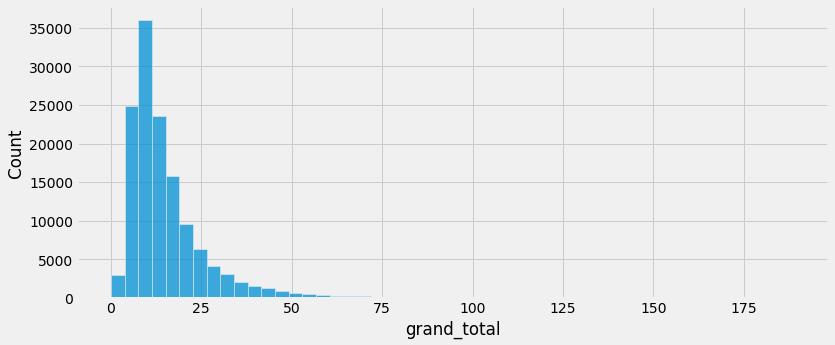

In [53]:
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 14
plt.figure(figsize=(12,5))
palette = sns.color_palette('Paired', 10)
sns.histplot(orders[orders['grand_total'] < 200]['grand_total'], bins=50)

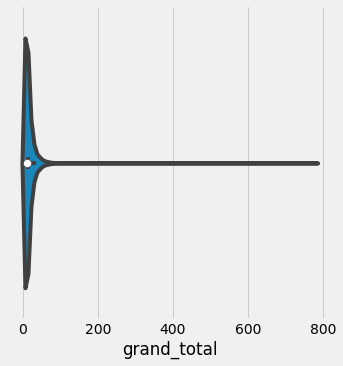

In [59]:
sns.catplot(x='grand_total', data=orders, kind='violin');

In [67]:
# We can also visualise binned fare_amount variable
orders['fare-bin'] = pd.cut(orders['grand_total'], bins = list(range(0, 50, 5)), include_lowest=True).astype('str')

# Uppermost bin
orders.loc[orders['fare-bin'] == 'nan', 'fare-bin'] = '[45+]'

# apply this to clean up the first bin's label
# orders['fare-bin'] = orders['fare-bin'].apply(lambda x: x.replace('-0.001', '0'))

# sort by fare the correct look in the chart
orders = orders.sort_values(by='fare-bin')

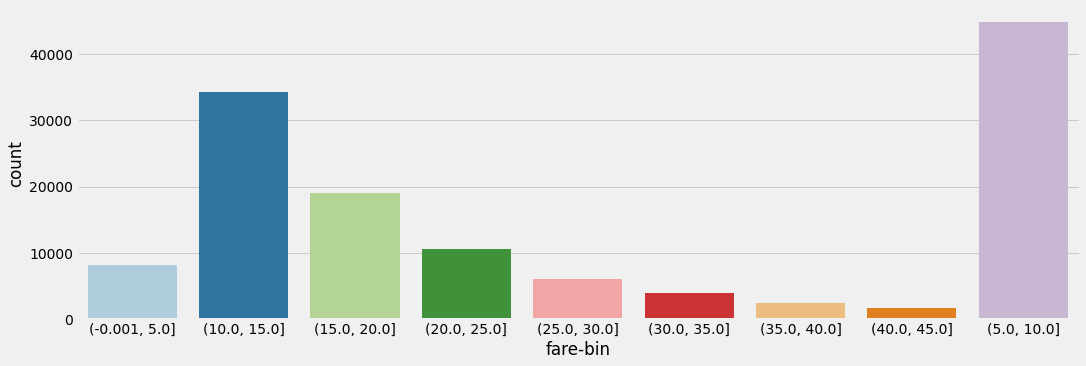

In [68]:
sns.catplot(x="fare-bin", kind="count", palette=palette, data=orders, height=5, aspect=3);
sns.despine()
plt.show()

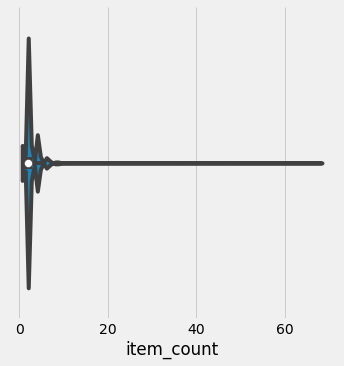

In [62]:
sns.catplot(x='item_count', data=orders, kind='violin');

### Geospatial data

In [74]:
vendors.columns

Index(['id', 'authentication_id', 'latitude', 'longitude',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2',
       'prepration_time', 'commission', 'is_akeed_delivering',
       'discount_percentage', 'status', 'verified', 'rank', 'language',
       'vendor_rating', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time1',
       'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
       'friday_from_time1', 'friday_to_time1', 'friday_from_time2',
       'friday_to_time2', 'saturday_from_time1', 'saturday_to_time1',
       'saturday_from_time2', 'saturday

In [77]:
orders_2 = orders.merge(vendors, left_on='vendor_id', right_on='id', how='inner')

In [78]:
orders_2.columns

Index(['akeed_order_id', 'customer_id', 'item_count', 'grand_total',
       'payment_mode', 'promo_code', 'vendor_discount_amount',
       'promo_code_discount_percentage', 'is_favorite', 'is_rated',
       'vendor_rating_x', 'driver_rating', 'deliverydistance',
       'preparationtime', 'delivery_time', 'order_accepted_time',
       'driver_accepted_time', 'ready_for_pickup_time', 'picked_up_time',
       'delivered_time', 'delivery_date', 'vendor_id', 'created_at_x',
       'LOCATION_NUMBER', 'LOCATION_TYPE', 'CID X LOC_NUM X VENDOR',
       'fare-bin', 'id', 'authentication_id', 'latitude', 'longitude',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2',
       'prepration_time', 'commission', 'is_akeed_delivering',
       'discount_percentage', 'status', 'verified', 'rank', 'language',
       'vendor_rating_y', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2',

In [79]:
# make sur your install folium first
import folium
from folium.plugins import HeatMap
from folium.plugins import HeatMapWithTime

In [82]:
center_location = [40.758896, -73.985130]
m = folium.Map(location=center_location, control_scale=True, zoom_start=2)

In [88]:
orders_2[['latitude', 'longitude']].tail()

,latitude,longitude
135298,-0.33434,0.726333
135299,-0.33434,0.726333
135300,-0.33434,0.726333
135301,-0.33434,0.726333
135302,-0.33434,0.726333


In [ ]:
orders_2

In [93]:
orders_2 = orders_2[orders_2.latitude < 50]

In [ ]:
orders_2

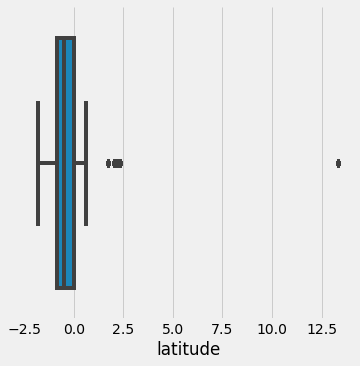

In [94]:
sns.catplot(x='latitude', data=orders_2, kind="box")

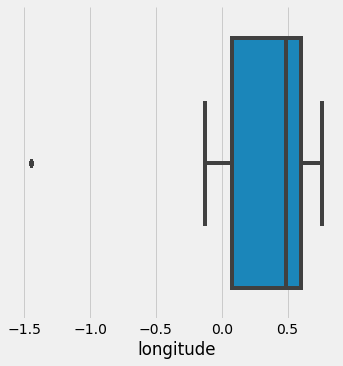

In [95]:
sns.catplot(x='longitude', data=orders_2, kind="box")

In [87]:
orders_2["map_count"] = 1
heatmap_data = orders_2[['latitude', 'longitude', 'map_count']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist()
gradient = {0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}
HeatMap(data=heatmap_data, radius=5, gradient=gradient, max_zoom=5).add_to(m)
m

# Collaborative filtering: memory based

In [18]:
orders_2.columns

Index(['akeed_order_id', 'customer_id', 'item_count', 'grand_total',
       'payment_mode', 'promo_code', 'vendor_discount_amount',
       'promo_code_discount_percentage', 'is_favorite', 'is_rated',
       'vendor_rating', 'driver_rating', 'deliverydistance', 'preparationtime',
       'delivery_time', 'order_accepted_time', 'driver_accepted_time',
       'ready_for_pickup_time', 'picked_up_time', 'delivered_time',
       'delivery_date', 'vendor_id', 'created_at_x', 'LOCATION_NUMBER',
       'LOCATION_TYPE', 'CID X LOC_NUM X VENDOR', 'gender', 'dob', 'status',
       'verified', 'language', 'created_at_y', 'updated_at'],
      dtype='object')

In [19]:
orders.vendor_rating.unique()

array([nan,  5.,  4.,  2.,  1.,  3.,  0.])

In [29]:
orders_bis = orders[~orders.vendor_rating.isna()]

In [27]:
orders_bis[cols]

,customer_id,item_count,grand_total,is_favorite,is_rated,vendor_rating,driver_rating
101,OH64IO0,2.0,10.8,NaN,Yes,5.0,5.0
159,FCPLE31,3.0,28.0,NaN,Yes,5.0,5.0
175,WB681BO,2.0,11.7,NaN,Yes,4.0,3.0
272,FS229TW,2.0,9.5,NaN,Yes,4.0,0.0
453,3P9113W,1.0,9.8,NaN,Yes,5.0,5.0
...,...,...,...,...,...,...,...
135283,3S6VG6R,1.0,10.9,No,Yes,5.0,5.0
135285,CIXLEU0,1.0,7.0,No,Yes,2.0,5.0
135286,AVD95T0,3.0,12.5,No,Yes,5.0,5.0
135289,NE6ZHRW,3.0,43.6,Yes,Yes,5.0,5.0


In [30]:
table = pd.pivot_table(orders_bis, values='vendor_rating', index=['customer_id'], columns=['vendor_id'], aggfunc=np.mean)

In [31]:
table

vendor_id,4,13,20,23,28,33,43,44,55,66,...,681,841,843,845,846,849,855,856,858,907
customer_id,,,,,,,,,,,,,,,,,,,,,
000THBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
009UFS1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00GV4J4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00HWUU3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00OT8JX,2.307692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZRJABJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZZV76GY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZZVGIVK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
vendors = pd.read_csv('../raw_data/vendors.csv')

In [41]:
vendors.columns

Index(['id', 'authentication_id', 'latitude', 'longitude',
       'vendor_category_en', 'vendor_category_id', 'delivery_charge',
       'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2',
       'prepration_time', 'commission', 'is_akeed_delivering',
       'discount_percentage', 'status', 'verified', 'rank', 'language',
       'vendor_rating', 'sunday_from_time1', 'sunday_to_time1',
       'sunday_from_time2', 'sunday_to_time2', 'monday_from_time1',
       'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
       'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2',
       'tuesday_to_time2', 'wednesday_from_time1', 'wednesday_to_time1',
       'wednesday_from_time2', 'wednesday_to_time2', 'thursday_from_time1',
       'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
       'friday_from_time1', 'friday_to_time1', 'friday_from_time2',
       'friday_to_time2', 'saturday_from_time1', 'saturday_to_time1',
       'saturday_from_time2', 'saturday

In [47]:
vendors.shape

(100, 59)